# Importing models and dataset

In [1]:
#Import nescesarry models
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier      
from sklearn.tree import export_graphviz             
from six import StringIO                             
from IPython.display import Image             
import pydotplus   
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import gender_guesser.detector as gender

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(io = file)

# Exploration of the dataset

In [2]:
# Checking amount of rows and columns
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [3]:
# Checking the names of the features 
chef.keys()

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [4]:
# Labeling them all lower case
chef_cap = chef.rename(str.capitalize, axis='columns')

# Rechecking the names of the features 
chef_cap.keys()

Index(['Revenue', 'Cross_sell_success', 'Name', 'Email', 'First_name', 'Family_name', 'Total_meals_ordered', 'Unique_meals_purch', 'Contacts_w_customer_service', 'Product_categories_viewed', 'Avg_time_per_site_visit', 'Mobile_number', 'Cancellations_before_noon', 'Cancellations_after_noon', 'Tastes_and_preferences', 'Pc_logins', 'Mobile_logins', 'Weekly_plan', 'Early_deliveries', 'Late_deliveries', 'Package_locker', 'Refrigerated_locker', 'Avg_prep_vid_time', 'Largest_order_size', 'Master_classes_attended', 'Median_meal_rating', 'Avg_clicks_per_visit', 'Total_photos_viewed'], dtype='object')

In [5]:
# Relabeling Laregest Order Size 
chef_eda = chef_cap.rename(columns={"Largest_order_size" : "Avg_meals_pc"})

# Checking the first rows of the DataFrame
chef_eda.head(n=5)

,Revenue,Cross_sell_success,Name,Email,First_name,Family_name,Total_meals_ordered,Unique_meals_purch,Contacts_w_customer_service,Product_categories_viewed,Avg_time_per_site_visit,Mobile_number,Cancellations_before_noon,Cancellations_after_noon,Tastes_and_preferences,Pc_logins,Mobile_logins,Weekly_plan,Early_deliveries,Late_deliveries,Package_locker,Refrigerated_locker,Avg_prep_vid_time,Avg_meals_pc,Master_classes_attended,Median_meal_rating,Avg_clicks_per_visit,Total_photos_viewed
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [6]:
# Checking information about each variable
chef_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Revenue                      1946 non-null   float64
 1   Cross_sell_success           1946 non-null   int64  
 2   Name                         1946 non-null   object 
 3   Email                        1946 non-null   object 
 4   First_name                   1946 non-null   object 
 5   Family_name                  1899 non-null   object 
 6   Total_meals_ordered          1946 non-null   int64  
 7   Unique_meals_purch           1946 non-null   int64  
 8   Contacts_w_customer_service  1946 non-null   int64  
 9   Product_categories_viewed    1946 non-null   int64  
 10  Avg_time_per_site_visit      1946 non-null   float64
 11  Mobile_number                1946 non-null   int64  
 12  Cancellations_before_noon    1946 non-null   int64  
 13  Cancellations_afte

In [7]:
# Checking missing values
print(f"""Total Missing values:
--------------------------------------------
There are {chef_eda.isnull().sum().sum()} missing values, that represent 
{(chef_eda.isnull().sum().sum()/(1946*28)).round(decimals=4)*100} % of the data.
""")

print("""Columns with missing values:
---------------------------------------------""")
chef_eda.isnull().sum()

Total Missing values:
--------------------------------------------
There are 47 missing values, that represent 
0.09 % of the data.

Columns with missing values:
---------------------------------------------


Revenue                         0
Cross_sell_success              0
Name                            0
Email                           0
First_name                      0
Family_name                    47
Total_meals_ordered             0
Unique_meals_purch              0
Contacts_w_customer_service     0
Product_categories_viewed       0
Avg_time_per_site_visit         0
Mobile_number                   0
Cancellations_before_noon       0
Cancellations_after_noon        0
Tastes_and_preferences          0
Pc_logins                       0
Mobile_logins                   0
Weekly_plan                     0
Early_deliveries                0
Late_deliveries                 0
Package_locker                  0
Refrigerated_locker             0
Avg_prep_vid_time               0
Avg_meals_pc                    0
Master_classes_attended         0
Median_meal_rating              0
Avg_clicks_per_visit            0
Total_photos_viewed             0
dtype: int64

In [8]:
# Since we will not be using Family_name in analyisis, Drop column 
chef_new = chef_eda.drop(['Family_name'], axis = 1)

# Making sure all missing values have been taken care of
chef_new.isnull().any().any()

False

In [9]:
# Descriptive statistics for Numeric data
chef_new.describe(include = 'number').round(2)

,Revenue,Cross_sell_success,Total_meals_ordered,Unique_meals_purch,Contacts_w_customer_service,Product_categories_viewed,Avg_time_per_site_visit,Mobile_number,Cancellations_before_noon,Cancellations_after_noon,Tastes_and_preferences,Pc_logins,Mobile_logins,Weekly_plan,Early_deliveries,Late_deliveries,Package_locker,Refrigerated_locker,Avg_prep_vid_time,Avg_meals_pc,Master_classes_attended,Median_meal_rating,Avg_clicks_per_visit,Total_photos_viewed
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [10]:
%%html
<style>
table {float:left}
</style>

# Feature Engineering


Continuous                    |  Interval/Counts              |  Categorical
:---------------------------  | :---------------------------  | :---------------------------
Revenue (target/y-variable)   | Cross_sell_success            | Name
Total_meals_ordered           | Product_categories_viewed     | Email
Unique_meals_purch            | Mobile_number                 | First_name
Contacts_w_customer_service   | Cancellations_before_noon     | Family_name
Avg_time_per_site_visit       | Cancellations_after_noon      | 
Early_deliveries              | Tastes_and_preferences        |   
Late_deliveries               | Pc_logins                     |   
Avg_prep_vid_time             | Mobile_logins                 |
Avg_meals_pc                  | Weekly_plan                   |
Avg_clicks_per_visit          | Package_locker                |
Total_photos_viewed           | Refrigerated_locker           |
                              | Master_classes_attended       |
                              | Median_meal_rating            |

## Continuous Base Modeling

In [11]:
# Creating a list of continuous features (including Target)
continuous_data = ['Revenue','Total_meals_ordered',
                   'Unique_meals_purch','Contacts_w_customer_service',
                   'Avg_time_per_site_visit', 'Early_deliveries', 
                   'Late_deliveries','Avg_prep_vid_time','Avg_meals_pc',
                   'Avg_clicks_per_visit','Total_photos_viewed']

### Trend Visualization

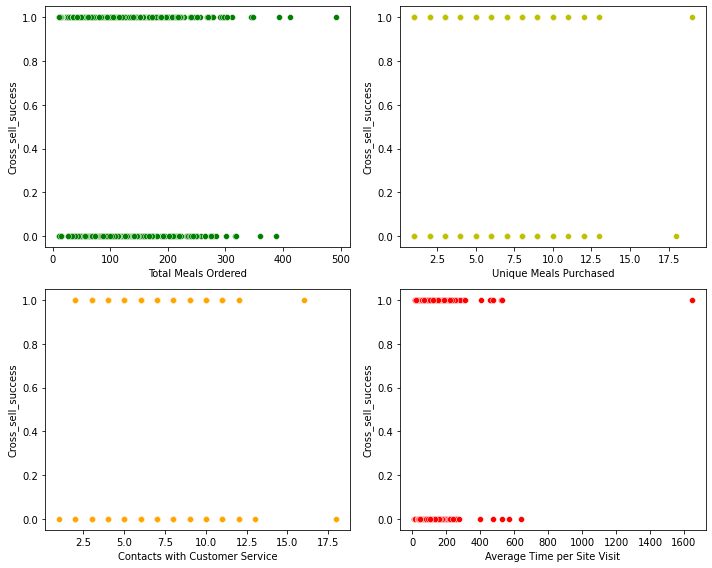

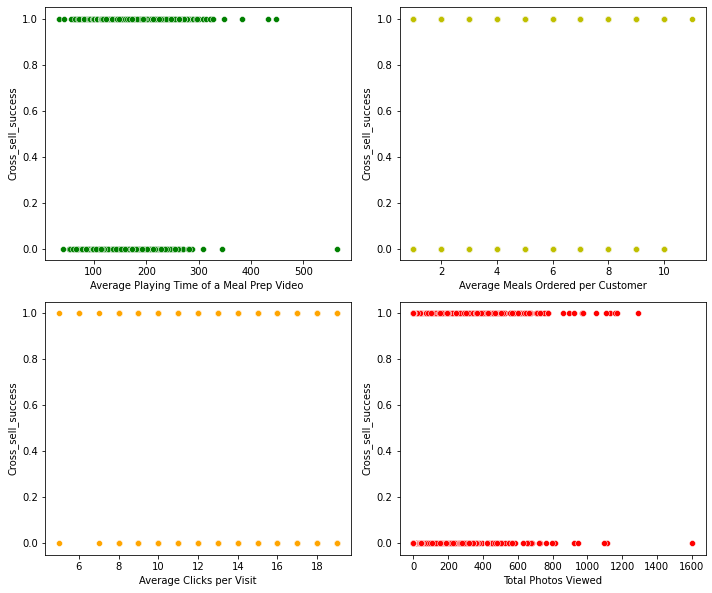

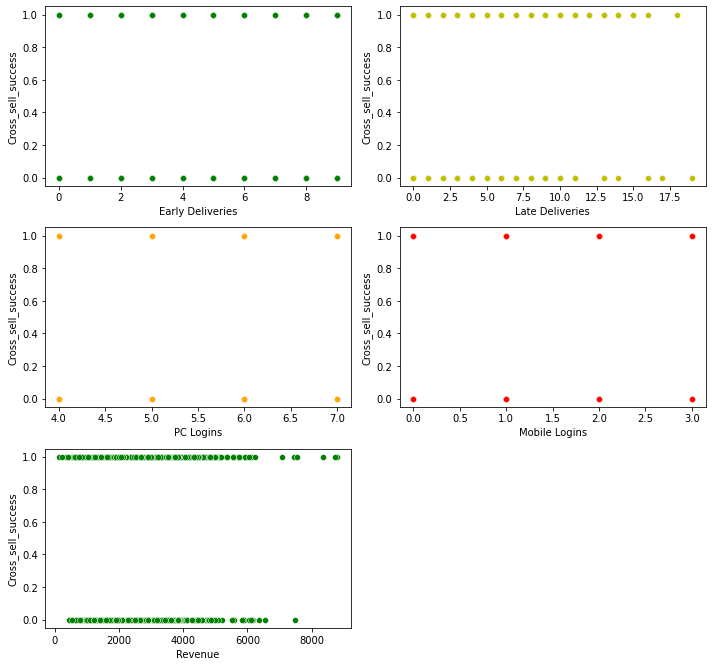

In [12]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef_new['Total_meals_ordered'],
                y = chef_new['Cross_sell_success'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Meals Ordered')
plt.ylabel(ylabel = 'Cross_sell_success')


########################

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef_new['Unique_meals_purch'],
                y = chef_new['Cross_sell_success'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Unique Meals Purchased')
plt.ylabel(ylabel = 'Cross_sell_success')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef_new['Contacts_w_customer_service'],
                y = chef_new['Cross_sell_success'],
                color = 'orange')

# adding labels but not adding title
plt.xlabel(xlabel = 'Contacts with Customer Service')
plt.ylabel(ylabel = 'Cross_sell_success')


########################

# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef_new['Avg_time_per_site_visit'],
                y = chef_new['Cross_sell_success'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Time per Site Visit')
plt.ylabel(ylabel = 'Cross_sell_success')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
#plt.savefig('./analysis_images/Chef Scatterplots 1 of 3.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef_new['Avg_prep_vid_time'],
                y = chef_new['Cross_sell_success'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Playing Time of a Meal Prep Video ')
plt.ylabel(ylabel = 'Cross_sell_success')


########################

# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef_new['Avg_meals_pc'],
                y = chef_new['Cross_sell_success'],
                color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Meals Ordered per Customer')
plt.ylabel(ylabel = 'Cross_sell_success')


########################

# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef_new['Avg_clicks_per_visit'],
                y = chef_new['Cross_sell_success'],
                color = 'orange')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average Clicks per Visit')
plt.ylabel(ylabel = 'Cross_sell_success')


########################

# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef_new['Total_photos_viewed'],
                y = chef_new['Cross_sell_success'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Total Photos Viewed')
plt.ylabel(ylabel = 'Cross_sell_success')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
#plt.savefig('./analysis_images/Chef Scatterplots 2 of 3.png')
plt.show()

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

#developing a scatterplot
plt.subplot(4, 2, 1)
sns.scatterplot(x = chef_new['Early_deliveries'],
                y = chef_new['Cross_sell_success'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Early Deliveries')
plt.ylabel(ylabel = 'Cross_sell_success')

########################

#developing a scatterplot
plt.subplot(4, 2, 2)
sns.scatterplot(x = chef_new['Late_deliveries'],
                y = chef_new['Cross_sell_success'],
                color = 'y')

# adding labels but not adding title
plt.xlabel(xlabel = 'Late Deliveries')
plt.ylabel(ylabel = 'Cross_sell_success')

########################

#developing a scatterplot
plt.subplot(4, 2, 3)
sns.scatterplot(x = chef_new['Pc_logins'],
                y = chef_new['Cross_sell_success'],
                color = 'orange')

# adding labels but not adding title
plt.xlabel(xlabel = 'PC Logins')
plt.ylabel(ylabel = 'Cross_sell_success')

########################

#developing a scatterplot
plt.subplot(4, 2, 4)
sns.scatterplot(x = chef_new['Mobile_logins'],
                y = chef_new['Cross_sell_success'],
                color = 'r')

# adding labels but not adding title
plt.xlabel(xlabel = 'Mobile Logins')
plt.ylabel(ylabel = 'Cross_sell_success')


########################

#developing a scatterplot
plt.subplot(4, 2, 5)
sns.scatterplot(x = chef_new['Revenue'],
                y = chef_new['Cross_sell_success'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Cross_sell_success')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
#plt.savefig('./analysis_images/Chef Scatterplots 3 of 3.png')
plt.show()

### Outlier Tresholds

In [13]:
def outlier_threshold (variable):
    # First quartile (Q1) 
    Q3, Q1 = np.percentile(variable, [75 , 25])
  
    # Interquaritle range (IQR) 
    IQR = Q3 - Q1
    
    # Calculate outlier_rule
    outlier_rule = 1.5*(IQR)
    
    # Calculate upper outliers
    outlier_hi = Q3 + outlier_rule
    outlier_lo = Q1 - outlier_rule
    
    # Print outlier treshold
    print(outlier_hi, outlier_lo)

In [14]:
# Revenue 
outlier_threshold(variable = chef_new['Revenue'])

# Total_meals_ordered
outlier_threshold(variable = chef_new['Total_meals_ordered'])

# Avg_time_per_site_visit
outlier_threshold(variable = chef_new['Avg_time_per_site_visit'])

# Early_deliveries
outlier_threshold(variable = chef_new['Early_deliveries'])

# Late_deliveries
outlier_threshold(variable = chef_new['Late_deliveries'])

# Avg_prep_vid_time
outlier_threshold(variable = chef_new['Avg_prep_vid_time'])

# Avg_meals_pc
outlier_threshold(variable = chef_new['Avg_meals_pc'])

# Total_photos_viewed
outlier_threshold(variable = chef_new['Total_photos_viewed'])

4650.0 -630.0
179.0 -45.0
185.21875 4.0687500000000085
7.5 -4.5
8.5 -3.5
262.8375000000001 25.337499999999963
8.0 0.0
435.0 -261.0


In [15]:
# Dummy variables for outlier tresholds 
out_Revenue                     = 4650
out_Total_meals_ordered         = 179
out_Avg_time_psv_hi             = 185
out_Avg_time_psv_lo             = 4.0
out_Early_deliveries            = 7.5
out_Late_deliveries             = 8.5
out_Avg_prep_vid_time_hi        = 262.8
out_Avg_prep_vid_time_lo        = 25.3
out_Avg_meals_pc                = 8
out_Total_photos_viewed         = 435

# Start for-loop
for index, value in chef_new.iterrows():
    
    # out_Revenue
    if chef_new.loc[index, 'Revenue'] > out_Revenue:
        chef_new.loc[index, 'out_Revenue'] = 1
    else: 
        chef_new.loc[index, 'out_Revenue'] = 0
        
    # out_Total_meals_ordered 
    if chef_new.loc[index, 'Total_meals_ordered'] > out_Total_meals_ordered:
        chef_new.loc[index, 'out_Total_meals_ordered'] = 1
    else:
        chef_new.loc[index, 'out_Total_meals_ordered'] = 0
    
    # out_Avg_time_per_site_visit
    if chef_new.loc[index, 'Avg_time_per_site_visit'] > out_Avg_time_psv_hi:
        chef_new.loc[index, 'out_Avg_time_per_site_visit'] = 1  
    elif chef_new.loc[index, 'Avg_time_per_site_visit'] < out_Avg_time_psv_lo:
        chef_new.loc[index, 'out_Avg_time_per_site_visit'] = 1 
    else:
        chef_new.loc[index, 'out_Avg_time_per_site_visit'] = 0
    
    # out_Early_deliveries
    if chef_new.loc[index, 'Early_deliveries'] > out_Early_deliveries:
        chef_new.loc[index, 'out_Early_deliveries'] = 1
    else:
        chef_new.loc[index, 'out_Early_deliveries'] = 0
    
    # out_Late_deliveries
    if chef_new.loc[index, 'Late_deliveries'] > out_Late_deliveries:
        chef_new.loc[index, 'out_Late_deliveries'] = 1
    else:
        chef_new.loc[index, 'out_Late_deliveries'] = 0
        
    # out_Avg_prep_vid_time
    if chef_new.loc[index, 'Avg_prep_vid_time'] > out_Avg_prep_vid_time_hi:
        chef_new.loc[index, 'out_Avg_prep_vid_time'] = 1
    elif chef_new.loc[index, 'Avg_prep_vid_time'] < out_Avg_prep_vid_time_lo:
        chef_new.loc[index, 'out_Avg_prep_vid_time'] = 1
    else:
        chef_new.loc[index, 'out_Avg_prep_vid_time'] = 0
        
    # out_Avg_meals_pc
    if chef_new.loc[index, 'Avg_meals_pc'] > out_Avg_meals_pc:
        chef_new.loc[index, 'out_Avg_meals_pc'] = 1
    else:
        chef_new.loc[index, 'out_Avg_meals_pc'] = 0
        
    # out_Total_photos_viewed
    if chef_new.loc[index, 'Total_photos_viewed'] > out_Total_photos_viewed:
        chef_new.loc[index, 'out_Total_photos_viewed'] = 1
    else:
        chef_new.loc[index, 'out_Total_photos_viewed'] = 0

### Creating dummies

In [16]:
# Dummy variables for inregulare plots
chef_new['Ordered_regularly']                  = 0
chef_new['Regular_contact_w_customer_service'] = 0
chef_new['has_Viewed_photos']                  = 0
chef_new['On_time_delivery']                   = 0
chef_new['has_Logins']                         = 0 
chef_new['has_Unique_meals_purch']             = 0

# Start for-loop
for index, value in chef_new.iterrows():
    
    # Ordered_regularly (x >= 20)
    if chef_new.loc[index, 'Total_meals_ordered'] >= 20:
        chef_new.loc[index, 'Ordered_regularly'] = 1
        
    # Regular_contact (x > 10)
    if chef_new.loc[index, 'Contacts_w_customer_service'] > 10:
        chef_new.loc[index, 'Regular_contact_w_customer_service'] = 1
    
    # Has viewed photos 
    if chef_new.loc[index, 'Total_photos_viewed'] > 0:
        chef_new.loc[index, 'has_Viewed_photos'] = 1
        
    # On-time delivery 
    if chef_new.loc[index, 'Early_deliveries'] == 0 and chef_new.loc[index, 'Late_deliveries'] == 0:
        chef_new.loc[index, 'On_time_delivery'] = 1
        
    # Has logins
        if chef_new.loc[index, 'Mobile_logins'] > 0:
            chef_new.loc[index, 'has_Logins'] = 1
            
    # Has Unique meals purchased
        if chef_new.loc[index, 'Unique_meals_purch'] > 1:
            chef_new.loc[index, 'has_Unique_meals_purch'] = 1

In [17]:
# Total Clicks per Visit
chef_new['Total_clicks_per_visit'] = chef_new['Avg_clicks_per_visit'] * \
                                    (chef_new['Pc_logins'] + chef_new['Mobile_logins'])

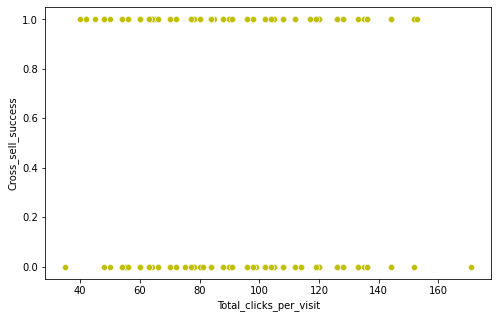

In [18]:
# Setting figure size
fig, ax = plt.subplots(figsize = (8, 5))

# Creating the plot
tot_c_plot = sns.scatterplot(x = chef_new['Total_clicks_per_visit'],
                             y = chef_new['Cross_sell_success'],
                             color = 'y')
# Showing and saving the plot
#plt.savefig('./analysis_images/Total clicks per visit.png')
plt.show()

### Log transformations & Visualizations

In [19]:
# Creating UDF for histograms
def continuous_histograms(data, x_var):
    sns.displot(data   = data,
                x      = x_var, 
                height = 3, 
                aspect = 2)
    plt.tight_layout()
    #plt.savefig('./analysis_images/Continuous Histograms.png')
    plt.show()

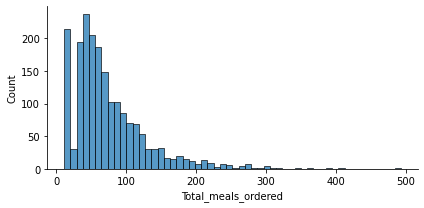

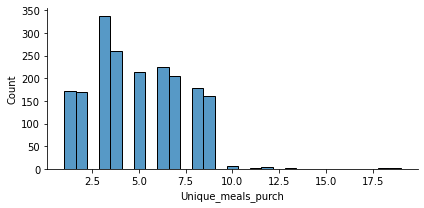

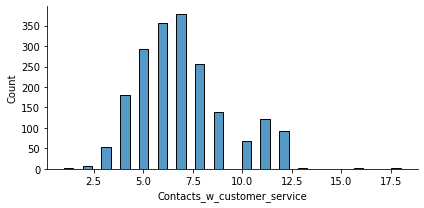

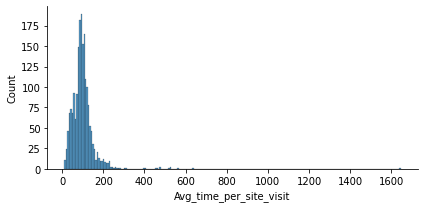

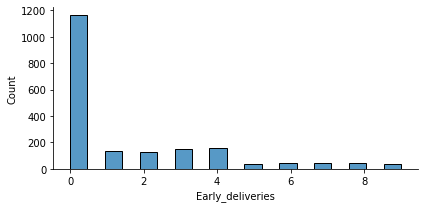

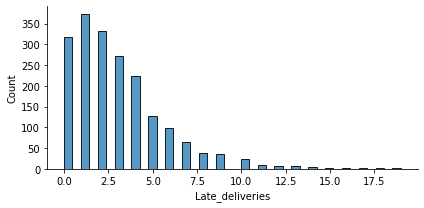

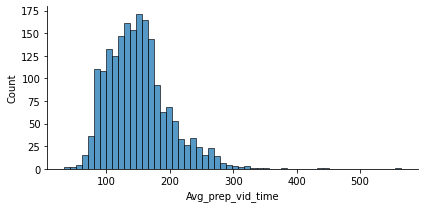

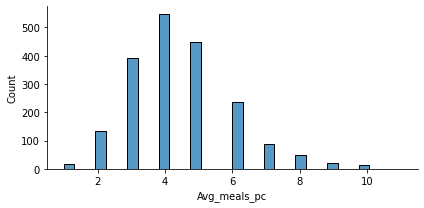

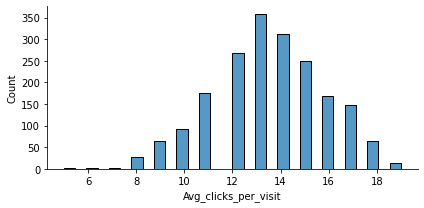

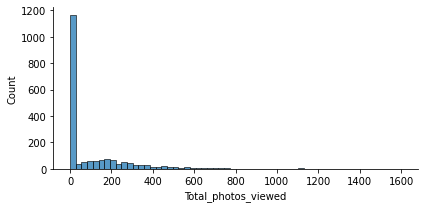

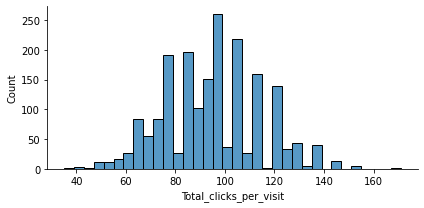

In [20]:
# calling the function for Total_meals_ordered
continuous_histograms(data   = chef_new,
                      x_var  = 'Total_meals_ordered')

# calling the function for Unique_meals_purch
continuous_histograms(data   = chef_new,
                      x_var  = 'Unique_meals_purch')

# calling the function for Contacts_w_customer_service
continuous_histograms(data   = chef_new,
                      x_var  = 'Contacts_w_customer_service')

# calling the function for Avg_time_per_site_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'Avg_time_per_site_visit')

# calling the function for Early_deliveries
continuous_histograms(data   = chef_new,
                      x_var  = 'Early_deliveries')

# calling the function for Late_deliveries
continuous_histograms(data   = chef_new,
                      x_var  = 'Late_deliveries')

# calling the function for Avg_prep_vid_time
continuous_histograms(data   = chef_new,
                      x_var  = 'Avg_prep_vid_time')

# calling the function for Avg_meals_pc
continuous_histograms(data   = chef_new,
                      x_var  = 'Avg_meals_pc')

# calling the function for Avg_clicks_per_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'Avg_clicks_per_visit')

# calling the function for Total_photos_viewed
continuous_histograms(data   = chef_new,
                      x_var  = 'Total_photos_viewed')

# calling the function for Total_clicks_per_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'Total_clicks_per_visit')

In [21]:
# log transforming Revenue and saving it to the dataset
chef_new['log_Total_meals_ordered'] = np.log10(chef_new['Total_meals_ordered'])
chef_new['log_Unique_meals_purch'] = np.log10(chef_new['Unique_meals_purch'])
chef_new['log_Contacts_w_customer_service'] = np.log10(chef_new['Contacts_w_customer_service'])
chef_new['log_Avg_time_per_site_visit'] = np.log10(chef_new['Avg_time_per_site_visit'])
chef_new['log_Early_deliveries'] = np.log10(chef_new['Early_deliveries']+0.1)
chef_new['log_Late_deliveries'] = np.log10(chef_new['Late_deliveries']+0.1)
chef_new['log_Avg_prep_vid_time'] = np.log10(chef_new['Avg_prep_vid_time'])
chef_new['log_Avg_meals_pc'] = np.log10(chef_new['Avg_meals_pc'])
chef_new['log_Avg_clicks_per_visit'] = np.log10(chef_new['Avg_clicks_per_visit'])
chef_new['log_Total_photos_viewed'] = np.log10(chef_new['Total_photos_viewed']+0.1)
chef_new['log_Total_clicks_per_visit'] = np.log10(chef_new['Total_clicks_per_visit'])
chef_new['log_Revenue'] = np.log10(chef_new['Revenue'])

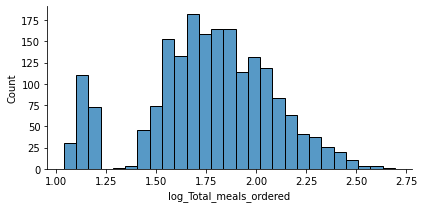

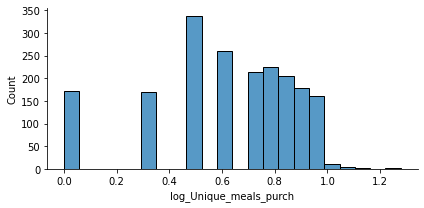

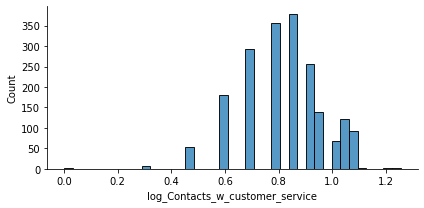

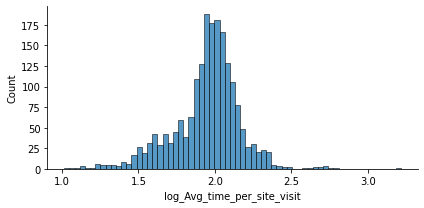

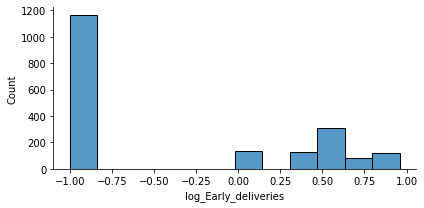

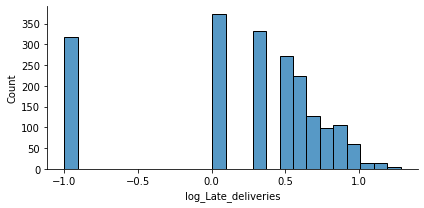

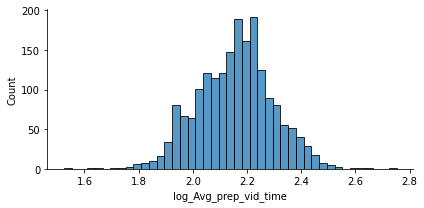

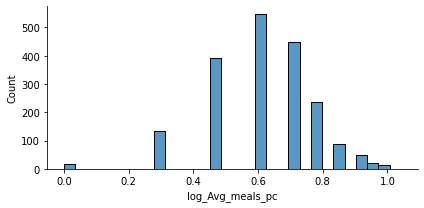

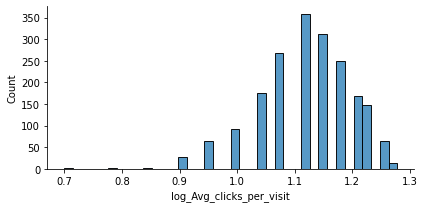

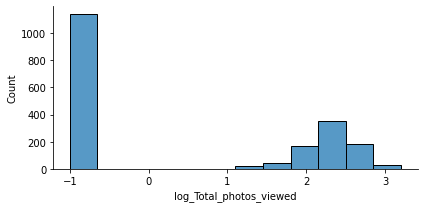

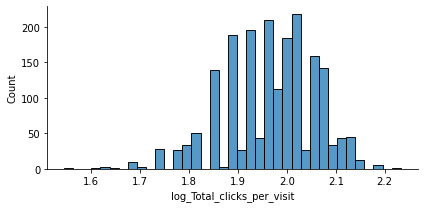

In [22]:
# calling the function for Total_meals_ordered
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Total_meals_ordered')

# calling the function for Unique_meals_purch
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Unique_meals_purch')

# calling the function for Contacts_w_customer_service
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Contacts_w_customer_service')

# calling the function for Avg_time_per_site_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Avg_time_per_site_visit')

# calling the function for Early_deliveries
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Early_deliveries')

# calling the function for Late_deliveries
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Late_deliveries')

# calling the function for Avg_prep_vid_time
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Avg_prep_vid_time')

# calling the function for Avg_meals_pc
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Avg_meals_pc')

# calling the function for Avg_clicks_per_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Avg_clicks_per_visit')

# calling the function for Total_photos_viewed
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Total_photos_viewed')

# calling the function for Total_clicks_per_visit
continuous_histograms(data   = chef_new,
                      x_var  = 'log_Total_clicks_per_visit')


### Revenue features

In [23]:
# Revenue per Order
chef_new['Revenue_p_Order'] = chef_new['Revenue'] / chef_new['Total_meals_ordered']

## Interval / Count Engineering

In [24]:
# Creating a list of continuous features (including Revenue)
interval_data = ['Cross_sell_success','Product_categories_viewed','Mobile_number',
                 'Cancellations_before_noon','Cancellations_after_noon',\
                 'Tastes_and_preferences','Pc_logins','Mobile_logins','Weekly_plan',\
                 'Package_locker','Refrigerated_locker',\
                 'Master_classes_attended','Median_meal_rating']

### Log transformations

In [25]:
# Transform Count variables that are not 0/1 into log
chef_new['log_Product_categories_viewed'] = np.log10(chef_new['Product_categories_viewed'])
chef_new['log_Pc_logins'] = np.log10(chef_new['Pc_logins'])
chef_new['log_Median_meal_rating'] = np.log10(chef_new['Median_meal_rating'])

### Total Cancellations

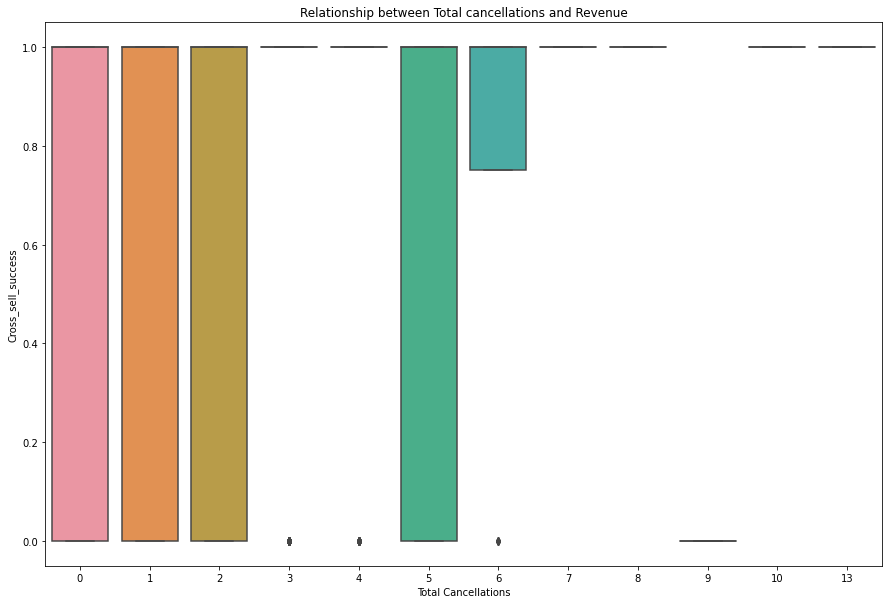


Cancellations

-----------
Total Cancellations
-----------
0     572
1     583
2     336
3     224
4     121
5      58
6      28
7      12
8       9
9       1
10      1
13      1
Name: Total_cancellations, dtype: int64

---------------------
Cancellation Correlations
---------------------
Cancellations_before_noon    0.16
Cancellations_after_noon    -0.05
Total_cancellations          0.14
Cross_sell_success           1.00
Name: Cross_sell_success, dtype: float64




In [26]:
# Total Cancellations
chef_new['Total_cancellations'] = chef_new['Cancellations_before_noon'] + \
                                 chef_new['Cancellations_after_noon']

# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# Developing a boxplot
sns.boxplot(x    = 'Total_cancellations',
            y    = 'Cross_sell_success',
            data = chef_new)

# Titles and labels
plt.title(label   = 'Relationship between Total cancellations and Revenue')
plt.xlabel(xlabel = 'Total Cancellations')
plt.ylabel(ylabel = 'Cross_sell_success')

# Displaying & saving the plot
plt.tight_layout
#plt.savefig('./analysis_images/Total Cancellations boxplot.png')
plt.show()

# Developing a correlation matrix
canc_corr = chef_new.loc[ : , ['Cancellations_before_noon',
                               'Cancellations_after_noon',
                               'Total_cancellations',
                               'Cross_sell_success']  ].corr(method = 'pearson')\
                                            .round(decimals = 2)

# Printing value counts and correlations cancellations
print(f"""
Cancellations
=========

-----------
Total Cancellations
-----------
{chef_new['Total_cancellations'].value_counts(normalize = False).sort_index()}

---------------------
Cancellation Correlations
---------------------
{canc_corr['Cross_sell_success']}

""")

### Total Logins

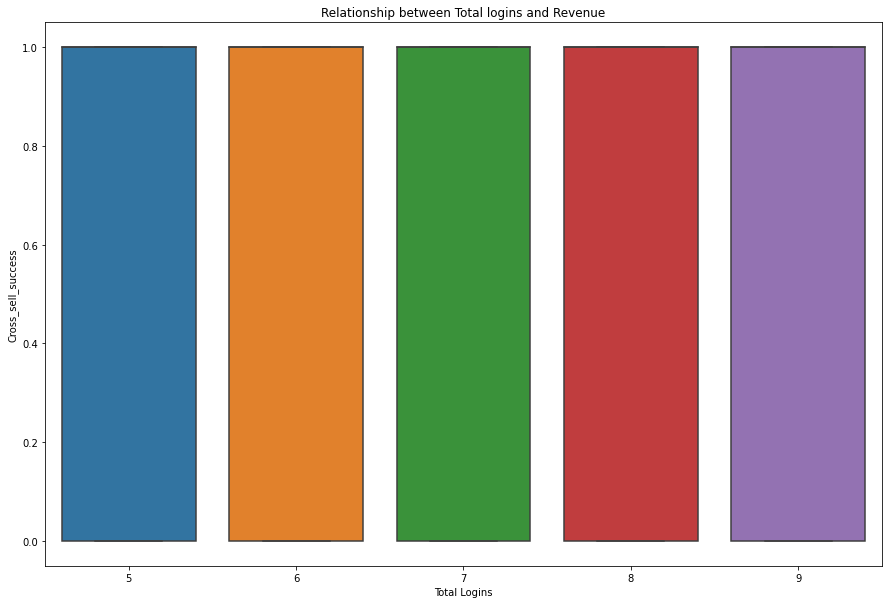


Logins

-----------
Total Logins
-----------
5     31
6    493
7    906
8    492
9     24
Name: Total_logins, dtype: int64

---------------------
Login Correlations
---------------------
Pc_logins             0.04
Mobile_logins        -0.05
Total_logins         -0.00
Cross_sell_success    1.00
Name: Cross_sell_success, dtype: float64




In [27]:
# Total Logins
chef_new['Total_logins'] = chef_new['Pc_logins'] + chef_new['Mobile_logins']

# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# Developing a boxplot
sns.boxplot(x    = 'Total_logins',
            y    = 'Cross_sell_success',
            data = chef_new)

# Titles and labels
plt.title(label   = 'Relationship between Total logins and Revenue')
plt.xlabel(xlabel = 'Total Logins')
plt.ylabel(ylabel = 'Cross_sell_success')

# Displaying and saving the plot
plt.tight_layout
#plt.savefig('./analysis_images/Total Logins boxplot.png')
plt.show()

# Developing a correlation matrix
login_corr = chef_new.loc[ : , ['Pc_logins',
                                'Mobile_logins',
                                'Total_logins',
                                'Cross_sell_success']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)

# Printing value counts and correlations logins
print(f"""
Logins
=========

-----------
Total Logins
-----------
{chef_new['Total_logins'].value_counts(normalize = False).sort_index()}

---------------------
Login Correlations
---------------------
{login_corr['Cross_sell_success']}

""")

### Ok_deliveries

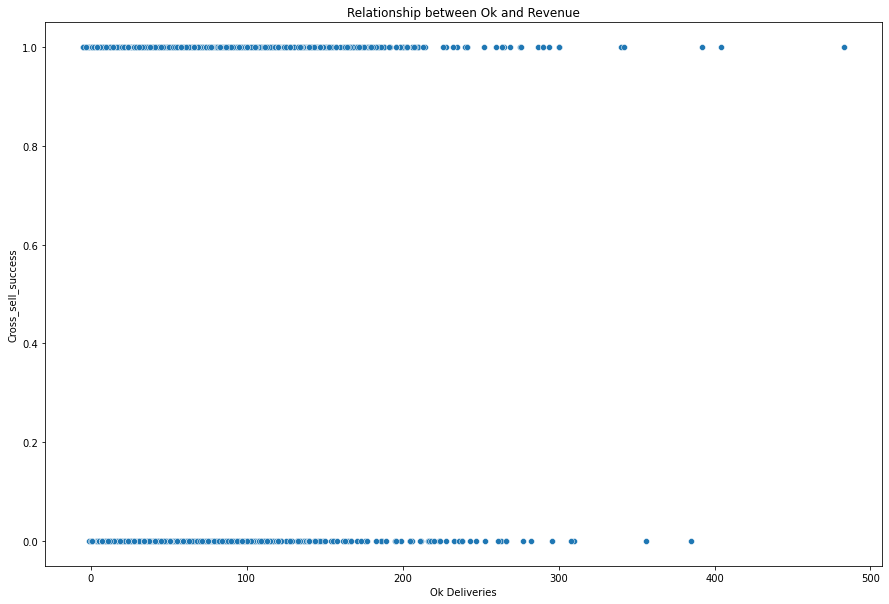


Delivery Correlations

Early_deliveries      0.02
Late_deliveries       0.01
Ok_deliveries         0.00
Cross_sell_success    1.00
Name: Cross_sell_success, dtype: float64



In [28]:
# On-time Deliveries
chef_new['Ok_deliveries'] = chef_new['Total_meals_ordered'] - chef_new['Total_cancellations'] \
                                 - (chef_new['Early_deliveries'] + chef_new['Late_deliveries'])

# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# Developing a boxplot
sns.scatterplot(x    = 'Ok_deliveries',
                y    = 'Cross_sell_success',
                data = chef_new)

# Titles and labels
plt.title(label   = 'Relationship between Ok and Revenue')
plt.xlabel(xlabel = 'Ok Deliveries')
plt.ylabel(ylabel = 'Cross_sell_success')

# Displaying and saving the plot
plt.tight_layout
#plt.savefig('./analysis_images/Ok Deliveries scatterplot.png')
plt.show()

# developing a correlation matrix
del_corr = chef_new.loc[ : , ['Early_deliveries',
                              'Late_deliveries',
                              'Ok_deliveries',
                              'Cross_sell_success']  ].corr(method = 'pearson')\
                                           .round(decimals = 2)

# printing value counts and correlations deliveries
print(f"""
Delivery Correlations
=====================

{del_corr['Cross_sell_success']}
""")

In [29]:
# Changing - to 0 
chef_new['Ok_deliveries'].replace([-5,-4,-3,-2,-1],0, inplace = True)

### Outlier Thresholds

In [30]:
# New outlier_thresholds 
outlier_threshold(variable = chef_new['Total_cancellations'])
outlier_threshold(variable = chef_new['Ok_deliveries'])

5.0 -3.0
173.0 -51.0


In [31]:
# Create Outlier Threshold for new variable
out_Total_cancellations         = 5
out_Ok_deliveries               = 173


# Start for-loop
for index, value in chef_new.iterrows():
        
    # out_Total_cancellations
    if chef_new.loc[index, 'Total_cancellations'] > out_Total_cancellations:
        chef_new.loc[index, 'out_Total_cancellations'] = 1
    else:
        chef_new.loc[index, 'out_Total_cancellations'] = 0
        
    # out_Ok_deliveries
    if chef_new.loc[index, 'Ok_deliveries'] > out_Ok_deliveries:
        chef_new.loc[index, 'out_Ok_deliveries'] = 1
    else:
        chef_new.loc[index, 'out_Ok_deliveries'] = 0

## Encoding Categorical Data

### Email Feature

In [32]:
# STEP 1: Splitting emails

# Placeholder list: Email_group
Email_group = []

# Looping over each email address
for index, col in chef_new.iterrows():
    
    # Splitting email domain at '@'
    split_email = chef_new.loc[index, 'Email'].split(sep = '@')
    
    # Appending placeholder_lst with the results
    Email_group.append(split_email)
    
# Converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(Email_group)

# Displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [33]:
# STEP 2: Concatenating with original DataFrame

# Renaming column to concatenate
email_df.columns = ['0' , 'Email_domain']

# Concatenating Email_domain with chef_new DataFrame
chef_new = pd.concat([chef_new, email_df['Email_domain']],
                      axis = 1)

# Printing value counts of personal_email_domain
chef_new.loc[ : ,'Email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
mcdonalds.com        28
jnj.com              28
cocacola.com         28
nike.com             27
apple.com            27
ibm.com              26
ge.org               26
dupont.com           26
microsoft.com        25
chevron.com          25
travelers.com        24
unitedhealth.com     24
exxon.com            24
boeing.com           23
caterpillar.com      22
mmm.com              22
verizon.com          22
pg.com               22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
goldmansacs.com      18
unitedtech.com       18
cisco.com            18
homedepot.com        17
intel.com            17
Name: Email_domain, dtype: int64

In [34]:
# Email domain types
Personal = ['@gmail.com','@yahoo.com','@protonmail.com']
Junk  = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

# Placeholder list: Email_group
Email_group = []

# Looping to group observations by domain type
for domain in chef_new['Email_domain']:
        if '@' + domain in Personal:
            Email_group.append('Personal')
        elif '@' + domain in Junk:
            Email_group.append('Junk')
        else:
            Email_group.append('Professional')

# Concatenating with original DataFrame
chef_new['Email_group'] = pd.Series(Email_group)

# Counting each category in Email_group column
print(f"""
Email_group
------
{chef_new['Email_group'].value_counts()}
""")


Email_group
------
Personal        861
Professional    696
Junk            389
Name: Email_group, dtype: int64



In [35]:
# Defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    # Plot and save figure
    plt.suptitle("")
    plt.savefig('./analysis_images/Categorical Boxplots.png')
    plt.show()

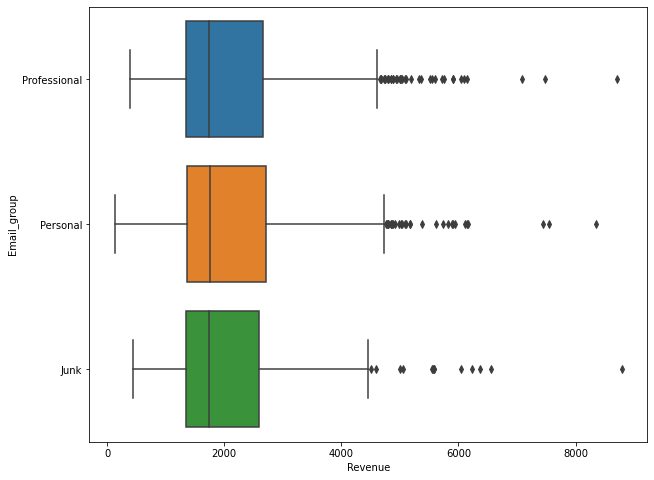

In [36]:
# Calling the function for Email_group
categorical_boxplots(response = 'Revenue',
                     cat_var  = 'Email_group',
                     data     = chef_new)

In [37]:
# One hot encoding categorical variables
one_hot_Email_group = pd.get_dummies(chef_new['Email_group'])

# Dropping categorical variables after they've been encoded
chef_new = chef_new.drop('Email_group', axis = 1)

# Joining codings together
chef_new = chef_new.join([one_hot_Email_group])

# Saving new columns
new_columns = chef_new.columns

### Name Feature

In [38]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='House_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [39]:
# calling text_split_feature
text_split_feature(col = 'Name',
                   df  = chef_new)


# checking results
chef_new['House_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: House_names, dtype: int64

### Gender Feature

In [ ]:
# guessing gender based on (given) name

# placeholder list
placeholder_lst = []


# looping to guess gender
for name in chef_new['First_name']:
    guess = gender.Detector().get_gender(name)
    print(guess)
    placeholder_lst.append(guess)


# converting list into a series
chef_new['Gender_guess'] = pd.Series(placeholder_lst)


# checking results
chef_new.loc[ : , ['First_name'  , 'Gender_guess']]

In [ ]:
pd.Series(placeholder_lst).to_csv('name_gender_guesser.csv')

In [40]:
Gender_guess = ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'mostly_male', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'female', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'mostly_male', 'male', 'male', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 'male', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'mostly_male', 'unknown', 'unknown', 'male', 'andy', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'male', 'female', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'mostly_female', 'female', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'male', 'unknown', 'male', 'unknown', 'mostly_male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'mostly_male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'andy', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown']

chef_new['Gender_guess'] = Gender_guess

In [41]:
chef_new['Gender_guess'].replace('mostly_female','female', inplace=True)
chef_new['Gender_guess'].replace('mostly_male','male', inplace=True)
chef_new['Gender_guess'].replace('andy','male', inplace=True)

In [42]:
# One hot encoding categorical variables
one_hot_Gender = pd.get_dummies(chef_new['Gender_guess'])

# Dropping categorical variables after they've been encoded
chef_new = chef_new.drop('Gender_guess', axis = 1)

# Joining codings together
chef_new = chef_new.join([one_hot_Gender])

# Saving new columns
new_columns = chef_new.columns

## Creating final DF

In [43]:
# Dropping Professional dummie and all other remaining categorical columns 
chef_fin = chef_new.drop(['Professional','Email_domain', 'Email', 'Name', 'First_name', 'unknown'], 
                          axis = 1)

In [44]:
# Making a copy of chef_fin
chef_explanatory = chef_fin.copy()

# Dropping Revenue and log_Revenue from the explanatory variable set
chef_explanatory = chef_explanatory.drop(['Cross_sell_success'], axis = 1)

# For-loo- for formatting each explanatory variable for statsmodels
for val in chef_explanatory:
    print(val, '+')

Revenue +
Total_meals_ordered +
Unique_meals_purch +
Contacts_w_customer_service +
Product_categories_viewed +
Avg_time_per_site_visit +
Mobile_number +
Cancellations_before_noon +
Cancellations_after_noon +
Tastes_and_preferences +
Pc_logins +
Mobile_logins +
Weekly_plan +
Early_deliveries +
Late_deliveries +
Package_locker +
Refrigerated_locker +
Avg_prep_vid_time +
Avg_meals_pc +
Master_classes_attended +
Median_meal_rating +
Avg_clicks_per_visit +
Total_photos_viewed +
out_Revenue +
out_Total_meals_ordered +
out_Avg_time_per_site_visit +
out_Early_deliveries +
out_Late_deliveries +
out_Avg_prep_vid_time +
out_Avg_meals_pc +
out_Total_photos_viewed +
Ordered_regularly +
Regular_contact_w_customer_service +
has_Viewed_photos +
On_time_delivery +
has_Logins +
has_Unique_meals_purch +
Total_clicks_per_visit +
log_Total_meals_ordered +
log_Unique_meals_purch +
log_Contacts_w_customer_service +
log_Avg_time_per_site_visit +
log_Early_deliveries +
log_Late_deliveries +
log_Avg_prep_vid_ti

In [ ]:
# Saving feature-rich dataset in Excel
chef_fin.to_excel('./datasets/Apprentice_Chef_Feature_Rich.xlsx',
                 index = False)

# Classification
## UDFs

In [45]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # Visualizing the confusion matrix

    # Setting labels
    lbls = labels

    # Declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)
    
    # Heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')

    # Create visualization labels/titles and show
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

## Correlation with Target

In [46]:
# Create Pearson correlation 
df_corr = chef_fin.corr(method = 'pearson').round(decimals = 2)

# Printing (Pearson) correlations with Revenue and log_Revenue
print(f"""
Cross Sell Success Corr      
------------------------      
{df_corr.loc['Cross_sell_success'].sort_values(ascending = False)}  
""")


Cross Sell Success Corr      
------------------------      
Cross_sell_success                    1.00
House_names                           0.16
Cancellations_before_noon             0.16
Total_cancellations                   0.14
male                                  0.11
Mobile_number                         0.10
Tastes_and_preferences                0.08
Refrigerated_locker                   0.07
out_Total_cancellations               0.06
log_Contacts_w_customer_service       0.05
log_Pc_logins                         0.05
out_Avg_prep_vid_time                 0.05
Contacts_w_customer_service           0.04
Package_locker                        0.04
Master_classes_attended               0.04
Pc_logins                             0.04
Personal                              0.04
log_Avg_meals_pc                      0.03
log_Avg_prep_vid_time                 0.03
log_Median_meal_rating                0.03
Median_meal_rating                    0.03
Avg_prep_vid_time                  

## Train-test-split

In [47]:
# Declaring explanatory variables
chef_full_data   = chef_fin.drop('Cross_sell_success', axis = 1)

# Declaring target variable
chef_full_target = chef_fin.loc[ : , 'Cross_sell_success']

# train-test split with stratification
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
                                                    chef_full_data,
                                                    chef_full_target,
                                                    test_size    = 0.25,
                                                    random_state = 219,
                                                    stratify     = chef_full_target)


# Merging training data for statsmodels
chef_train_full = pd.concat([X_train_full, y_train_full], axis = 1)

In [48]:
# Checking value counts of Training and Testing
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train_full.value_counts(normalize = True).round(decimals = 2)}

Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test_full.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: Cross_sell_success, dtype: float64

Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: Cross_sell_success, dtype: float64



## Creating logit models
### Logit_small

In [49]:
# Instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """Cross_sell_success ~ Junk +
                                                    Cancellations_before_noon +
                                                    House_names + 
                                                    male +
                                                    female""",
                           data = chef_train_full)

# FITTING the model object
results_logistic = logistic_small.fit()


# Checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.558257
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                            5
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1110
Time:                        17:30:29   Log-Likelihood:                -814.50
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.339e-42
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.1790      0.182     -0.984      0.325      -0.535       0.177
Junk                         -1.5107      0.144    -10.460      0.000      -1.794      -1.228
Cancellations_before_noon     0.2721      0.046      5.931      0.000       0.182       0.362
House_names                   0.4894      0.092      5.312      0.000       0.309       0.670
male                          0.4573      0.158      2.899      0.004       0.148       0.766
female                       -0.5577      0.215     -2.598      0.009      -0.978      -0.137
=============================================================================================
"""

### Logit_full

In [50]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ Cross_sell_success ~  Revenue +
                                                    Total_meals_ordered +
                                                    Unique_meals_purch +
                                                    Contacts_w_customer_service +
                                                    Product_categories_viewed +
                                                    Avg_time_per_site_visit +
                                                    Mobile_number +
                                                    Cancellations_before_noon +
                                                    Tastes_and_preferences +
                                                    Pc_logins +
                                                    Mobile_logins +
                                                    Weekly_plan +
                                                    Early_deliveries +
                                                    Late_deliveries +
                                                    Package_locker +
                                                    Refrigerated_locker +
                                                    Avg_prep_vid_time +
                                                    Avg_meals_pc +
                                                    Master_classes_attended +
                                                    Median_meal_rating +
                                                    Avg_clicks_per_visit +
                                                    Total_photos_viewed +
                                                    out_Revenue +
                                                    out_Total_meals_ordered +
                                                    out_Avg_time_per_site_visit +
                                                    out_Early_deliveries +
                                                    out_Late_deliveries +
                                                    out_Avg_prep_vid_time +
                                                    out_Avg_meals_pc +
                                                    out_Total_photos_viewed +
                                                    Ordered_regularly +
                                                    Regular_contact_w_customer_service +
                                                    has_Viewed_photos +
                                                    On_time_delivery +
                                                    has_Unique_meals_purch +
                                                    Total_clicks_per_visit +
                                                    log_Total_meals_ordered +
                                                    log_Unique_meals_purch +
                                                    log_Contacts_w_customer_service +
                                                    log_Avg_time_per_site_visit +
                                                    log_Early_deliveries +
                                                    log_Late_deliveries +
                                                    log_Avg_prep_vid_time +
                                                    log_Avg_meals_pc +
                                                    log_Avg_clicks_per_visit +
                                                    log_Total_photos_viewed +
                                                    log_Total_clicks_per_visit +
                                                    log_Revenue +
                                                    log_Product_categories_viewed +
                                                    log_Pc_logins +
                                                    log_Median_meal_rating +
                                                    Total_cancellations +
                                                    Ok_deliveries +
                                                    out_Total_cancellations +
                                                    out_Ok_deliveries +
                                                    Revenue_p_Order +
                                                    Junk +
                                                    Personal +
                                                    House_names + 
                                                    male +
                                                    female""",
                                data    = chef_train_full)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

         Current function value: 0.513065
         Iterations: 35


/Users/jasmijnvanhulsen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1397
Method:                           MLE   Df Model:                           61
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1830
Time:                        17:30:30   Log-Likelihood:                -748.56
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.648e-39
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -31.8961   2.02e+04     -0.002      0.999   -3.96e+04    3.96e+04
Revenue                               -0.0003      0.000     -1.038      0.299      -0.001       0.000
Total_meals_ordered                   -1.0583      0.904     -1.171      0.242      -2.830       0.713
Unique_meals_purch                    -0.0162      0.089     -0.181      0.856      -0.192       0.159
Contacts_w_customer_service            0.1527      0.200      0.765      0.444      -0.238       0.544
Product_categories_viewed              0.0146      0.076      0.193      0.847      -0.133       0.163
Avg_time_per_site_visit               -0.0002      0.002     -0.125      0.900      -0.004       0.004
Mobile_number                          1.0149      0.189      5.378      0.000       0.645       1.385
Cancellations_before_noon              0.6172      0.159      3.883      0.000       0.306       0.929
Tastes_and_preferences                 0.4088      0.143      2.856      0.004       0.128       0.689
Pc_logins                             -1.6761      1.746     -0.960      0.337      -5.099       1.747
Mobile_logins                         -0.1180      1.443     -0.082      0.935      -2.947       2.711
Weekly_plan                            0.0067      0.005      1.353      0.176      -0.003       0.016
Early_deliveries                       1.2572      0.908      1.384      0.166      -0.523       3.037
Late_deliveries                        1.0455      0.904      1.156      0.248      -0.727       2.818
Package_locker                         0.0440      0.154      0.286      0.775      -0.257       0.345
Refrigerated_locker                    0.6188      0.250      2.478      0.013       0.129       1.108
Avg_prep_vid_time                     -0.0075      0.008     -0.931      0.352      -0.023       0.008
Avg_meals_pc                          -0.1872      0.220     -0.850      0.395      -0.619       0.244
Master_classes_attended                0.1325      0.122      1.090      0.276      -0.106       0.371
Median_meal_rating                     0.4066      0.573      0.710      0.478      -0.717       1.530
Avg_clicks_per_visit                  -0.5372      0.342     -1.570      0.116      -1.208       0.133
Total_photos_viewed                    0.0001      0.001      0.098      0.922      -0.002       0.003
out_Revenue                            0.6376      0.554      1.152      0.249      -0.447       1.722
out_Total_meals_ordered               -0.4614      1.269     -0.363      0.716      -2.949       2.027
out_Avg_time_per_site_visit            0.2003      0.424      0.473      0.637      -0.630       1.031
out_Early_deliveries                  -0.2316      0.528     -0.439      0.661      -1.266       0.802
out_Late_deliveries                   -0.0638      0.449     -0.142      0.887      -0.944       0.816
out_Avg_prep_vid_time                  2.2047   

### Logit_sig1

In [51]:
# instantiating a logistic regression model object
logistic_sig1 = smf.logit(formula = """ Cross_sell_success ~  Contacts_w_customer_service +
                                                    Mobile_number +
                                                    Cancellations_before_noon +
                                                    Tastes_and_preferences +
                                                    Mobile_logins +
                                                    Refrigerated_locker +
                                                    Avg_clicks_per_visit +
                                                    out_Total_meals_ordered +
                                                    out_Early_deliveries +
                                                    out_Avg_prep_vid_time +
                                                    Total_clicks_per_visit +
                                                    Revenue_p_Order +
                                                    Junk +
                                                    Personal +
                                                    House_names + 
                                                    male +
                                                    female""",
                                        data    = chef_train_full)


# fitting the model object
results_sig1 = logistic_sig1.fit()


# checking the results SUMMARY
results_sig1.summary()

Optimization terminated successfully.
         Current function value: 0.526656
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           17
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1613
Time:                        17:30:30   Log-Likelihood:                -768.39
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 9.086e-53
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0072      0.569      0.013      0.990      -1.108       1.122
Contacts_w_customer_service     0.0810      0.032      2.529      0.011       0.018       0.144
Mobile_number                   0.9530      0.181      5.275      0.000       0.599       1.307
Cancellations_before_noon       0.2858      0.047      6.021      0.000       0.193       0.379
Tastes_and_preferences          0.4197      0.138      3.037      0.002       0.149       0.691
Mobile_logins                  -0.4995      0.162     -3.077      0.002      -0.818      -0.181
Refrigerated_locker             0.5672      0.214      2.649      0.008       0.148       0.987
Avg_clicks_per_visit           -0.1834      0.061     -3.000      0.003      -0.303      -0.064
out_Total_meals_ordered        -0.8885      0.299     -2.971      0.003      -1.475      -0.302
out_Early_deliveries            0.7088      0.349      2.033      0.042       0.026       1.392
out_Avg_prep_vid_time           1.4947      0.528      2.828      0.005       0.459       2.530
Total_clicks_per_visit          0.0203      0.008      2.571      0.010       0.005       0.036
Revenue_p_Order                -0.0086      0.004     -2.289      0.022      -0.016      -0.001
Junk                           -1.9609      0.176    -11.163      0.000      -2.305      -1.617
Personal                       -0.5887      0.147     -4.017      0.000      -0.876      -0.302
House_names                     0.5122      0.094      5.476      0.000       0.329       0.696
male                            0.5049      0.164      3.086      0.002       0.184       0.826
female                         -0.6065      0.224     -2.712      0.007      -1.045      -0.168
===============================================================================================
"""

### Logit_sig2

In [52]:
# instantiating a logistic regression model object
logistic_sig2 = smf.logit(formula = """ Cross_sell_success ~ Mobile_number +
                                                    Cancellations_before_noon +
                                                    Tastes_and_preferences +
                                                    Pc_logins +
                                                    Early_deliveries +
                                                    Refrigerated_locker +
                                                    Avg_prep_vid_time +
                                                    Junk +
                                                    Personal +
                                                    House_names""",
                                        data    = chef_train_full)


# fitting the model object
results_sig2 = logistic_sig2.fit()


# checking the results SUMMARY
results_sig2.summary()

Optimization terminated successfully.
         Current function value: 0.541877
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                           10
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1371
Time:                        17:30:30   Log-Likelihood:                -790.60
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 3.052e-48
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.6944      0.678     -3.973      0.000      -4.024      -1.365
Mobile_number                 0.8714      0.176      4.945      0.000       0.526       1.217
Cancellations_before_noon     0.2798      0.046      6.041      0.000       0.189       0.371
Tastes_and_preferences        0.3993      0.135      2.950      0.003       0.134       0.665
Pc_logins                     0.2268      0.107      2.120      0.034       0.017       0.436
Early_deliveries              0.0615      0.028      2.223      0.026       0.007       0.116
Refrigerated_locker           0.5286      0.209      2.531      0.011       0.119       0.938
Avg_prep_vid_time             0.0026      0.001      2.088      0.037       0.000       0.005
Junk                         -1.9150      0.172    -11.164      0.000      -2.251      -1.579
Personal                     -0.5962      0.144     -4.135      0.000      -0.879      -0.314
House_names                   0.5431      0.094      5.781      0.000       0.359       0.727
=============================================================================================
"""

### Logit_sig3

In [53]:
# instantiating a logistic regression model object
logistic_sig3 = smf.logit(formula = """ Cross_sell_success ~ Contacts_w_customer_service +
                                                    Mobile_number +
                                                    Cancellations_before_noon +
                                                    Tastes_and_preferences +
                                                    Pc_logins +
                                                    Refrigerated_locker +
                                                    out_Total_meals_ordered +
                                                    out_Early_deliveries +
                                                    out_Avg_prep_vid_time +
                                                    Revenue_p_Order +
                                                    Junk +
                                                    Personal +
                                                    House_names + 
                                                    male +
                                                    female""",
                                        data    = chef_train_full)


# fitting the model object
results_sig3 = logistic_sig3.fit()


# checking the results SUMMARY
results_sig3.summary()

Optimization terminated successfully.
         Current function value: 0.529071
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1443
Method:                           MLE   Df Model:                           15
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1575
Time:                        17:30:30   Log-Likelihood:                -771.91
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.327e-52
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.7244      0.687     -3.966      0.000      -4.071      -1.378
Contacts_w_customer_service     0.0851      0.032      2.658      0.008       0.022       0.148
Mobile_number                   0.9589      0.180      5.332      0.000       0.606       1.311
Cancellations_before_noon       0.2856      0.047      6.034      0.000       0.193       0.378
Tastes_and_preferences          0.4193      0.138      3.040      0.002       0.149       0.690
Pc_logins                       0.2510      0.109      2.308      0.021       0.038       0.464
Refrigerated_locker             0.5741      0.214      2.681      0.007       0.154       0.994
out_Total_meals_ordered        -0.8186      0.293     -2.790      0.005      -1.394      -0.244
out_Early_deliveries            0.6688      0.348      1.919      0.055      -0.014       1.352
out_Avg_prep_vid_time           1.5536      0.524      2.962      0.003       0.526       2.582
Revenue_p_Order                -0.0091      0.004     -2.426      0.015      -0.016      -0.002
Junk                           -1.9457      0.175    -11.131      0.000      -2.288      -1.603
Personal                       -0.5867      0.146     -4.015      0.000      -0.873      -0.300
House_names                     0.5181      0.094      5.533      0.000       0.335       0.702
male                            0.5108      0.163      3.127      0.002       0.191       0.831
female                         -0.5757      0.223     -2.579      0.010      -1.013      -0.138
===============================================================================================
"""

### Logit_sig4

In [54]:
# instantiating a logistic regression model object
logistic_sig4 = smf.logit(formula = """ Cross_sell_success ~ Contacts_w_customer_service +
                                                    Mobile_number +
                                                    Cancellations_before_noon +
                                                    Tastes_and_preferences +
                                                    Mobile_logins +
                                                    Refrigerated_locker +
                                                    Avg_clicks_per_visit +
                                                    out_Avg_prep_vid_time +
                                                    Total_clicks_per_visit +
                                                    log_Total_meals_ordered +
                                                    log_Revenue +
                                                    Ok_deliveries +
                                                    Junk +
                                                    Personal +
                                                    House_names""",
                                        data    = chef_train_full)


# fitting the model object
results_sig4 = logistic_sig4.fit()


# checking the results SUMMARY
results_sig4.summary()

Optimization terminated successfully.
         Current function value: 0.532902
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1443
Method:                           MLE   Df Model:                           15
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1514
Time:                        17:30:30   Log-Likelihood:                -777.50
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.754e-50
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.8080      1.681     -0.481      0.631      -4.103       2.486
Contacts_w_customer_service     0.1257      0.035      3.558      0.000       0.056       0.195
Mobile_number                   0.8766      0.180      4.875      0.000       0.524       1.229
Cancellations_before_noon       0.2755      0.047      5.840      0.000       0.183       0.368
Tastes_and_preferences          0.4147      0.137      3.024      0.002       0.146       0.684
Mobile_logins                  -0.4694      0.161     -2.912      0.004      -0.785      -0.153
Refrigerated_locker             0.5665      0.211      2.685      0.007       0.153       0.980
Avg_clicks_per_visit           -0.1773      0.063     -2.795      0.005      -0.302      -0.053
out_Avg_prep_vid_time           1.6519      0.539      3.067      0.002       0.596       2.707
Total_clicks_per_visit          0.0196      0.008      2.502      0.012       0.004       0.035
log_Total_meals_ordered         2.4567      0.601      4.091      0.000       1.280       3.634
log_Revenue                    -1.0462      0.459     -2.277      0.023      -1.947      -0.146
Ok_deliveries                  -0.0111      0.003     -3.857      0.000      -0.017      -0.005
Junk                           -1.9480      0.174    -11.188      0.000      -2.289      -1.607
Personal                       -0.6011      0.146     -4.129      0.000      -0.886      -0.316
House_names                     0.5573      0.095      5.862      0.000       0.371       0.744
===============================================================================================
"""

### Logit_sig5

In [55]:
# instantiating a logistic regression model object
logistic_sig5 = smf.logit(formula = """ Cross_sell_success ~ Mobile_number +
                                                    Cancellations_before_noon +
                                                    Tastes_and_preferences +
                                                    Mobile_logins +
                                                    Refrigerated_locker +
                                                    Avg_clicks_per_visit +
                                                    Total_clicks_per_visit +
                                                    log_Total_meals_ordered +
                                                    log_Contacts_w_customer_service +
                                                    Ok_deliveries +
                                                    Junk +
                                                    Personal +
                                                    House_names + 
                                                    male +
                                                    female""",
                                        data    = chef_train_full)


# fitting the model object
results_sig5 = logistic_sig5.fit()


# checking the results SUMMARY
results_sig5.summary()

Optimization terminated successfully.
         Current function value: 0.532057
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1443
Method:                           MLE   Df Model:                           15
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1527
Time:                        17:30:30   Log-Likelihood:                -776.27
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 8.493e-51
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.9080      1.228     -2.368      0.018      -5.315      -0.501
Mobile_number                       0.8927      0.179      4.989      0.000       0.542       1.243
Cancellations_before_noon           0.2732      0.047      5.786      0.000       0.181       0.366
Tastes_and_preferences              0.3786      0.137      2.763      0.006       0.110       0.647
Mobile_logins                      -0.4565      0.161     -2.834      0.005      -0.772      -0.141
Refrigerated_locker                 0.5850      0.212      2.758      0.006       0.169       1.001
Avg_clicks_per_visit               -0.1548      0.062     -2.500      0.012      -0.276      -0.033
Total_clicks_per_visit              0.0184      0.008      2.347      0.019       0.003       0.034
log_Total_meals_ordered             1.3523      0.491      2.753      0.006       0.389       2.315
log_Contacts_w_customer_service     1.3482      0.486      2.772      0.006       0.395       2.301
Ok_deliveries                      -0.0070      0.003     -2.687      0.007      -0.012      -0.002
Junk                               -1.9546      0.174    -11.203      0.000      -2.297      -1.613
Personal                           -0.5956      0.146     -4.086      0.000      -0.881      -0.310
House_names                         0.5038      0.094      5.384      0.000       0.320       0.687
male                                0.4887      0.163      3.006      0.003       0.170       0.807
female                             -0.5962      0.222     -2.688      0.007      -1.031      -0.161
===================================================================================================
"""

### Logit_sig6

In [56]:
# instantiating a logistic regression model object
logistic_sig6 = smf.logit(formula = """ Cross_sell_success ~ Contacts_w_customer_service +
                                                    Mobile_number +
                                                    Cancellations_before_noon +
                                                    Tastes_and_preferences +
                                                    Mobile_logins +
                                                    Refrigerated_locker +
                                                    Avg_clicks_per_visit +
                                                    out_Avg_prep_vid_time +
                                                    Total_clicks_per_visit +
                                                    log_Total_meals_ordered +
                                                    Ok_deliveries +
                                                    Junk +
                                                    Personal +
                                                    House_names + 
                                                    male +
                                                    female""",
                                        data    = chef_train_full)


# fitting the model object
results_sig6 = logistic_sig6.fit()


# checking the results SUMMARY
results_sig6.summary()

Optimization terminated successfully.
         Current function value: 0.527805
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1442
Method:                           MLE   Df Model:                           16
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1595
Time:                        17:30:30   Log-Likelihood:                -770.07
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.023e-52
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.3638      1.212     -2.775      0.006      -5.740      -0.988
Contacts_w_customer_service     0.1057      0.035      3.053      0.002       0.038       0.174
Mobile_number                   0.9095      0.180      5.049      0.000       0.556       1.263
Cancellations_before_noon       0.2780      0.047      5.855      0.000       0.185       0.371
Tastes_and_preferences          0.3979      0.138      2.885      0.004       0.128       0.668
Mobile_logins                  -0.4778      0.162     -2.945      0.003      -0.796      -0.160
Refrigerated_locker             0.6200      0.213      2.906      0.004       0.202       1.038
Avg_clicks_per_visit           -0.1512      0.062     -2.433      0.015      -0.273      -0.029
out_Avg_prep_vid_time           1.5404      0.536      2.874      0.004       0.490       2.591
Total_clicks_per_visit          0.0195      0.008      2.479      0.013       0.004       0.035
log_Total_meals_ordered         1.8135      0.545      3.328      0.001       0.745       2.882
Ok_deliveries                  -0.0098      0.003     -3.446      0.001      -0.015      -0.004
Junk                           -1.9650      0.175    -11.207      0.000      -2.309      -1.621
Personal                       -0.6045      0.146     -4.131      0.000      -0.891      -0.318
House_names                     0.5137      0.094      5.458      0.000       0.329       0.698
male                            0.5068      0.164      3.099      0.002       0.186       0.827
female                         -0.5962      0.223     -2.677      0.007      -1.033      -0.160
===============================================================================================
"""

### Logit_sig7

In [57]:
# instantiating a logistic regression model object
logistic_sig7 = smf.logit(formula = """ Cross_sell_success ~ Revenue +
                                                    Contacts_w_customer_service +
                                                    Mobile_number +
                                                    Cancellations_before_noon +
                                                    Tastes_and_preferences +
                                                    Early_deliveries +
                                                    Refrigerated_locker +
                                                    out_Avg_prep_vid_time +
                                                    log_Total_meals_ordered +
                                                    log_Pc_logins +
                                                    Ok_deliveries +
                                                    Junk +
                                                    Personal +
                                                    House_names + 
                                                    male +
                                                    female""",
                                        data    = chef_train_full)


# fitting the model object
results_sig7 = logistic_sig7.fit()


# checking the results SUMMARY
results_sig7.summary()

Optimization terminated successfully.
         Current function value: 0.526569
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1442
Method:                           MLE   Df Model:                           16
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.1615
Time:                        17:30:30   Log-Likelihood:                -768.26
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.838e-53
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -7.3333      1.436     -5.107      0.000     -10.148      -4.519
Revenue                        -0.0002    7.6e-05     -2.096      0.036      -0.000   -1.03e-05
Contacts_w_customer_service     0.1316      0.036      3.639      0.000       0.061       0.202
Mobile_number                   0.9518      0.180      5.274      0.000       0.598       1.306
Cancellations_before_noon       0.2845      0.048      5.971      0.000       0.191       0.378
Tastes_and_preferences          0.4083      0.139      2.947      0.003       0.137       0.680
Early_deliveries                0.0541      0.028      1.917      0.055      -0.001       0.109
Refrigerated_locker             0.6000      0.214      2.799      0.005       0.180       1.020
out_Avg_prep_vid_time           1.7362      0.545      3.185      0.001       0.668       2.804
log_Total_meals_ordered         2.2085      0.568      3.886      0.000       1.094       3.323
log_Pc_logins                   3.1850      1.366      2.332      0.020       0.508       5.862
Ok_deliveries                  -0.0097      0.003     -3.407      0.001      -0.015      -0.004
Junk                           -1.9669      0.176    -11.206      0.000      -2.311      -1.623
Personal                       -0.5974      0.146     -4.079      0.000      -0.884      -0.310
House_names                     0.5233      0.094      5.568      0.000       0.339       0.707
male                            0.5160      0.164      3.153      0.002       0.195       0.837
female                         -0.5665      0.225     -2.523      0.012      -1.007      -0.126
===============================================================================================
"""

## Candidate_dict

In [58]:
# creating a dictionary to store candidate models
candidate_dict = {

 # full model
 'logit_full'   : ['Revenue','Total_meals_ordered','Unique_meals_purch',
                   'Contacts_w_customer_service','Product_categories_viewed',
                   'Avg_time_per_site_visit','Mobile_number','Cancellations_before_noon',
                   'Cancellations_after_noon','Tastes_and_preferences','Pc_logins',
                   'Mobile_logins','Weekly_plan','Early_deliveries',
                   'Late_deliveries','Package_locker','Refrigerated_locker',
                   'Avg_prep_vid_time','Avg_meals_pc','Master_classes_attended',
                   'Median_meal_rating','Avg_clicks_per_visit','Total_photos_viewed',
                   'has_Viewed_photos','On_time_delivery',
                   'has_Unique_meals_purch','Total_clicks_per_visit',
                   'log_Total_meals_ordered','log_Unique_meals_purch',
                   'log_Contacts_w_customer_service','log_Avg_time_per_site_visit',
                   'log_Early_deliveries','log_Late_deliveries','log_Avg_prep_vid_time',
                   'log_Avg_meals_pc','log_Avg_clicks_per_visit',
                   'log_Total_photos_viewed','log_Total_clicks_per_visit','log_Revenue',
                   'log_Product_categories_viewed','log_Pc_logins',
                   'log_Median_meal_rating','Ok_deliveries',
                   'Revenue_p_Order','Junk','Personal', 'House_names', 'male', 'female'],    
    
 # small model
 'logit_small'  : ['Junk','Cancellations_before_noon','House_names','male'],
 
 # significant variables only (set 1)
 'logit_sig1'    : ['Contacts_w_customer_service','Mobile_number',
                   'Cancellations_before_noon','Tastes_and_preferences',
                   'Mobile_logins','Refrigerated_locker','Avg_clicks_per_visit',
                   'out_Total_meals_ordered','out_Early_deliveries',
                   'out_Avg_prep_vid_time','Total_clicks_per_visit',
                   'Revenue_p_Order','Junk','Personal','House_names','male',
                    'female'],  

  # significant variables only (set 2)
  'logit_sig2'   : ['Mobile_number','Cancellations_before_noon',
                    'Tastes_and_preferences','Pc_logins','Early_deliveries',
                    'Refrigerated_locker','Avg_prep_vid_time',
                    'Junk','Personal','House_names'], 
    
  # significant variables only (set 3)
  'logit_sig3'   : ['Contacts_w_customer_service','Mobile_number',
                    'Cancellations_before_noon','Tastes_and_preferences',
                    'Pc_logins','Refrigerated_locker','out_Total_meals_ordered',
                    'out_Early_deliveries','out_Avg_prep_vid_time',
                    'Revenue_p_Order','Junk','Personal','House_names','male',
                    'female'], 
    
 # significant variables only (set 4)
  'logit_sig4'   : ['Contacts_w_customer_service','Mobile_number',
                    'Cancellations_before_noon','Tastes_and_preferences',
                    'Mobile_logins','Refrigerated_locker','Avg_clicks_per_visit',
                    'out_Avg_prep_vid_time','Total_clicks_per_visit',
                    'log_Total_meals_ordered','log_Revenue','Ok_deliveries',
                    'Junk','Personal','House_names'], 

 # significant variables only (set 5)
 'logit_sig5'    : ['Mobile_number','Cancellations_before_noon',
                   'Tastes_and_preferences','Mobile_logins',
                   'Refrigerated_locker','Avg_clicks_per_visit',
                   'Total_clicks_per_visit','log_Total_meals_ordered',
                   'log_Contacts_w_customer_service','Ok_deliveries','Junk',
                   'Personal','House_names','male','female'], 
    
 # significant variables only (set 6)
 'logit_sig6'    : ['Contacts_w_customer_service','Mobile_number',
                    'Cancellations_before_noon','Tastes_and_preferences',
                    'Mobile_logins','Refrigerated_locker','Avg_clicks_per_visit',
                    'out_Early_deliveries','out_Avg_prep_vid_time',
                    'Total_clicks_per_visit','log_Total_meals_ordered',
                    'Ok_deliveries','Junk','Personal','House_names','male','female'],
    
 # significant variables only (set 7)
 'logit_sig7'    : ['Revenue','Contacts_w_customer_service','Mobile_number',
                    'Cancellations_before_noon','Tastes_and_preferences',
                    'Early_deliveries','Refrigerated_locker',
                    'out_Avg_prep_vid_time','log_Total_meals_ordered',
                    'log_Pc_logins','Ok_deliveries','Junk','Personal','House_names', 
                    'male','female'],
}

## Train-test-split with Logit_sig

In [59]:
# train/test split with the sig model
chef_data   =  chef_fin.loc[ : , candidate_dict['logit_sig2']]
chef_target =  chef_fin.loc[ : , 'Cross_sell_success']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

## Logreg
### Untuned

In [60]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(4)

LogReg Training ACCURACY: 0.73
LogReg Testing  ACCURACY: 0.7228
AUC Score        : 0.6232


/Users/jasmijnvanhulsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Confusion Matrix Logreg

In [61]:
# Unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 54
False Positives: 102
False Negatives: 33
True Positives : 298



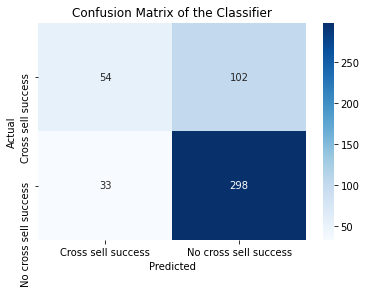

In [62]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Cross sell success', 'No cross sell success'])

#### Logreg AUC

In [63]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6232


#### Logreg Coefficients

In [64]:
# zipping each feature name to its coefficient
logreg_model_values = zip(chef_fin[candidate_dict['logit_sig4']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -1.02)
('Contacts_w_customer_service', 0.77)
('Mobile_number', 0.26)
('Cancellations_before_noon', 0.16)
('Tastes_and_preferences', 0.02)
('Mobile_logins', 0.05)
('Refrigerated_locker', 0.59)
('Avg_clicks_per_visit', 0.0)
('out_Avg_prep_vid_time', -1.88)
('Total_clicks_per_visit', -0.59)
('log_Total_meals_ordered', 0.48)


### LR Tuning

#### RandomizedSearchCV

In [ ]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 2000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [ ]:
# checking the results of RandomizedSearch CV
lr_tuned_cv.cv_results_

In [ ]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

In [65]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(lr_tuned_cv.cv_results_)

#### Lr_tuned 
- lr_tuned_cv.best_estimator_ | logit_sig2 | **AUC = 06.17**
- Mean validation score: 0.649 (std: 0.022)
- Parameters: {'warm_start': False, 'solver': 'lbfgs', 'C': 4.3}

In [66]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              C = 4.3,
                              warm_start = False, 
                              max_iter = 2000,
                              random_state = 219)

# Fitting model because I hardcoded
lr_tuned_fit = lr_tuned.fit(chef_data, chef_target)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))

# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(X_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7464
Testing  ACCURACY: 0.7454
AUC Score        : 0.6517


#### Confusion Matrix lr_tuned

In [67]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, 
                               y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 61
False Positives: 95
False Negatives: 29
True Positives : 302



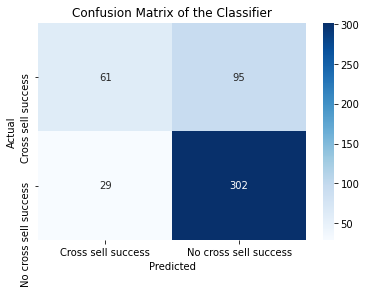

In [68]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = lr_tuned_pred,
          labels = ['Cross sell success', 'No cross sell success'])

## Classification Trees
### Full Tree

In [69]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(X_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(X_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9979
Full Tree Testing ACCURACY : 0.6858
Full Tree AUC Score: 0.6265


#### Confusion matrix full_tree

In [70]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, 
                                y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 72
False Positives: 84
False Negatives: 69
True Positives : 262



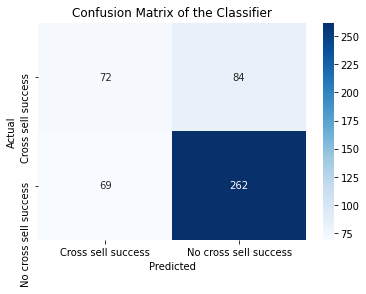

In [71]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_tree_pred,
          labels = ['Cross sell success', 'No cross sell success'])

### Pruning Tree
#### RandomizedSearch CV

In [ ]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 8, 1)
leaf_space      = pd.np.arange(1, 30, 1)
min_split_space = pd.np.arange(1, 25, 1)
node_space      = pd.np.arange(1, 25, 1)
feature_space   = ['auto', 'sqrt', 'log2', None]

# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space, 
              'min_samples_split': min_split_space, 
              'max_leaf_nodes'   : node_space, 
              'max_features'     : feature_space}

# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)

# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 2000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)

# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [ ]:
# checking the results of RandomizedSearch CV
tuned_tree_cv.cv_results_

In [ ]:
tuned_tree_cv.best_estimator_

In [ ]:
report(tuned_tree_cv.cv_results_)

#### Pruned Tree
- tuned_tree_cv.best_estimator_ | logit_sig2 | **AUC = 0.732** 
- Mean validation score: 0.703 (std: 0.024) 
- Parameters: {'splitter': 'best', 'min_samples_split': 14, 'min_samples_leaf': 16, 'max_leaf_nodes': 16, 'max_features': None, 'max_depth': 3, 'criterion': 'entropy'}

In [72]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(splitter          = 'best',
                                     min_samples_split = 14,
                                     min_samples_leaf  = 16,
                                     max_leaf_nodes    = 16,
                                     max_features      = None,
                                     max_depth         = 3,
                                     criterion         = 'entropy',
                                     random_state      = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(chef_data, chef_target)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)

# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7402
Testing  ACCURACY: 0.7762
AUC Score        : 0.732


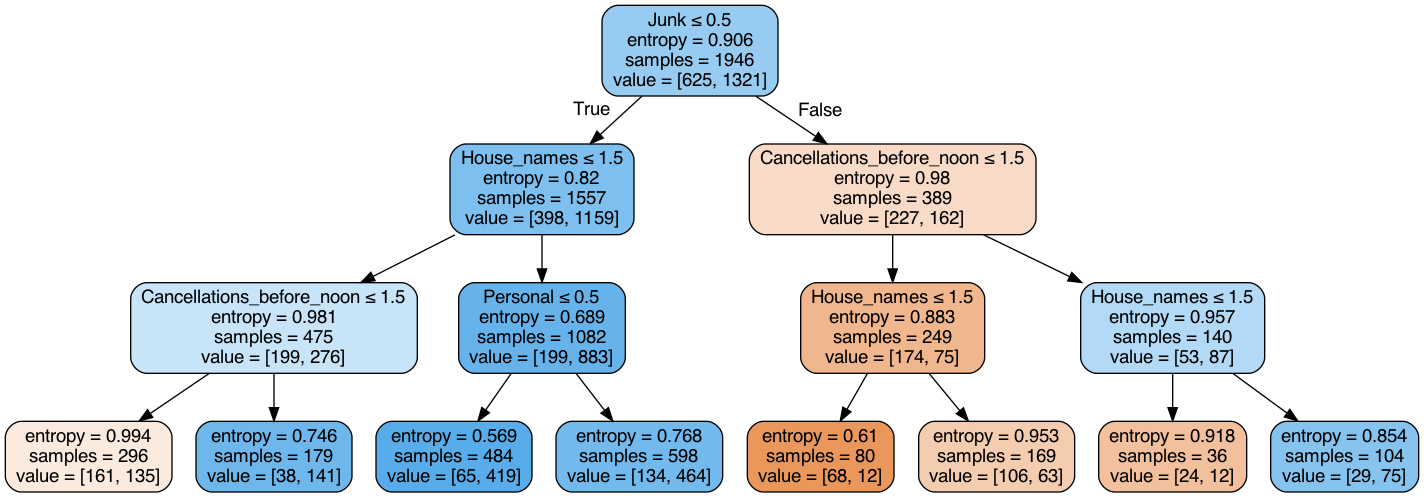

In [73]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = X_train)

#### Feature importance

<ipython-input-45-b3ad0c0cb511>:99: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


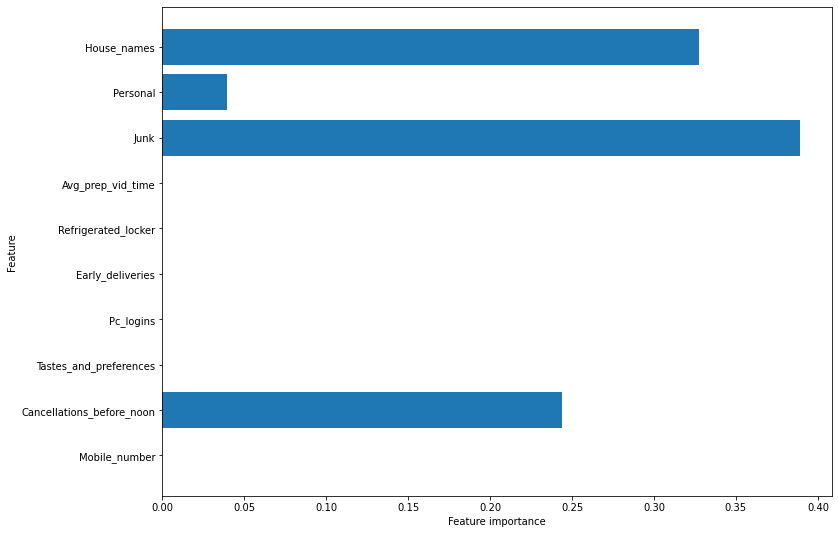

In [74]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = X_train,
                         export = False)

In [97]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, 
                                  y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 95
False Positives: 61
False Negatives: 48
True Positives : 283



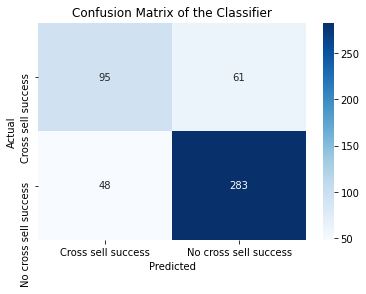

In [98]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = pruned_tree_pred,
          labels = ['Cross sell success', 'No cross sell success'])

### Saving Model

In [77]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic (sig2)      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree (sig2) Chosen   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic (logit_sig2)', 'Full Tree', 'Pruned Tree (logit_sig2)'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
#model_performance.to_excel('./model_results/classification_model_performance.xlsx',
#                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic (sig2)      0.6232         (54, 102, 33, 298)
Full Tree     0.6265         (72, 84, 69, 262)
Pruned Tree (sig2) Chosen   0.732         (95, 61, 48, 283)



## Train-test-split logit_full

In [78]:
# train/test split with the sig model
chef_data   =  chef_fin.loc[ : , candidate_dict['logit_full']]
chef_target =  chef_fin.loc[ : , 'Cross_sell_success']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

## RandomForrest
### Untuned Forrest

In [79]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [80]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7454
AUC Score        : 0.6365


#### Feature Importance

<ipython-input-45-b3ad0c0cb511>:99: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


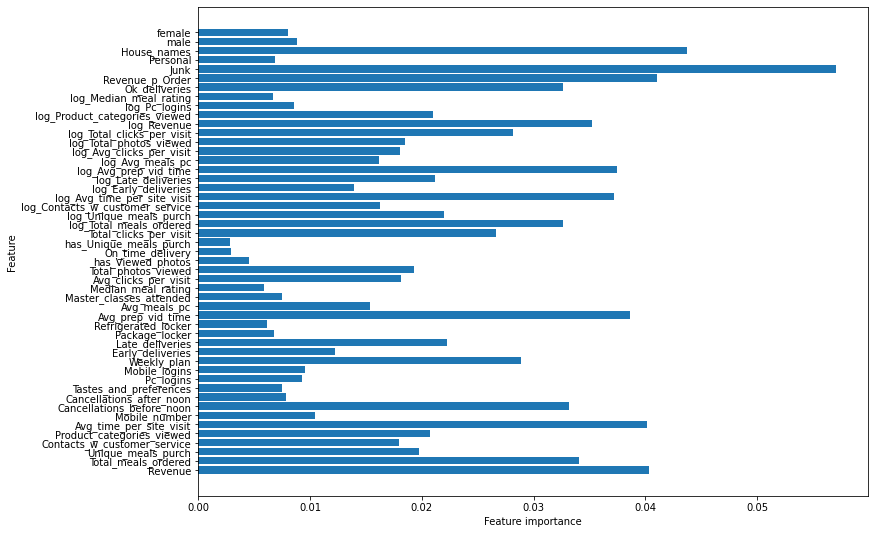

In [81]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = X_train,
                         export = False)

#### Confusion Matrix

In [82]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, 
                         y_pred = rf_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 52
False Positives: 104
False Negatives: 20
True Positives : 311



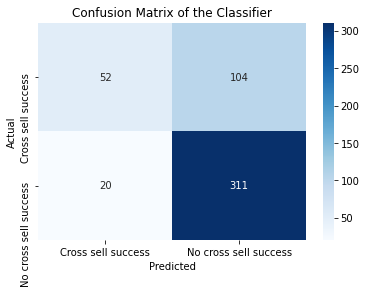

In [83]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = rf_default_pred,
          labels = ['Cross sell success', 'No cross sell success'])

### Tuning Forrest
#### RandomizedSearch CV

In [ ]:
# declaring a hyperparameter space
estimator_space   = pd.np.arange(100, 200, 25)
leaf_space        = pd.np.arange(1, 26, 2) 
criterion_space   = ['gini', 'entropy']
bootstrap_space   = [True, False]
warm_start_space  = [True, False]
max_features      = ['auto', 'sqrt']
max_depth         = pd.np.arange(1, 8, 1)
min_samples_split = pd.np.arange(0.1, 1.0, 0.1)


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space,
              'max_features'     : max_features,
              'max_depth'        : max_depth,
              'min_samples_split': min_samples_split}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 200,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [ ]:
# checking the results of RandomizedSearch CV
forest_cv.cv_results_

In [ ]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

In [ ]:
report(forest_cv.cv_results_)

#### Forrest Tuned

- forest_cv.best_estimator_ | full | **AUC = 0.6254**
- Mean validation score: 0.549 (std: 0.028)
- Parameters: {'warm_start': True, 'n_estimators': 125, 'min_samples_split': 0.1, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'gini', 'bootstrap': False}

In [84]:
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs= None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(chef_data, chef_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(X_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(X_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(X_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(X_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7519
Forest Tuned Testing  ACCURACY: 0.7556
Forest Tuned AUC Score        : 0.6254


#### Feature importance

<ipython-input-45-b3ad0c0cb511>:99: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


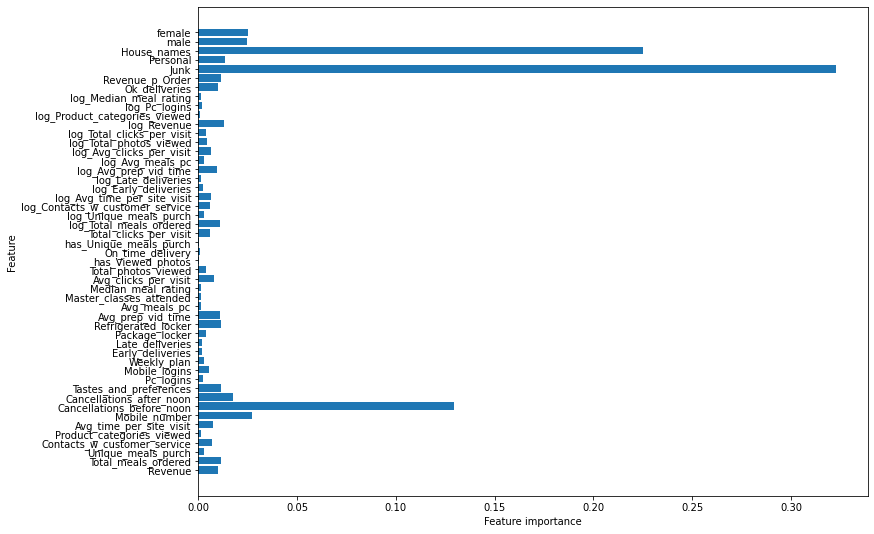

In [85]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = X_train,
                         export = False)

#### Confusion Matrix

In [86]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, 
                               y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 41
False Positives: 115
False Negatives: 4
True Positives : 327



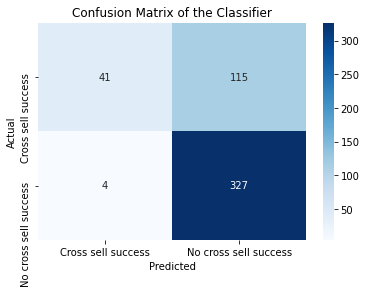

In [87]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = forest_tuned_pred,
          labels = ['Cross sell success', 'No cross sell success'])

### Saving Model

In [88]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(X_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(X_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic (logit_sig2),0.6232,0.7300,0.7228,"(54, 102, 33, 298)"
1,Full Tree,0.6265,0.9979,0.6858,"(72, 84, 69, 262)"
2,Pruned Tree (logit_sig2),0.7320,0.7402,0.7762,"(95, 61, 48, 283)"
3,Tuned Random Forest (Full),0.6254,0.7519,0.7556,"(41, 115, 4, 327)"


## Gradient Boosted Machines
### Untuned GBM

In [89]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.843
Testing ACCURACY : 0.7392
AUC Score        : 0.6556


#### Confusion Matrix

In [90]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, 
                                  y_pred = full_gbm_default_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 66
False Positives: 90
False Negatives: 37
True Positives : 294



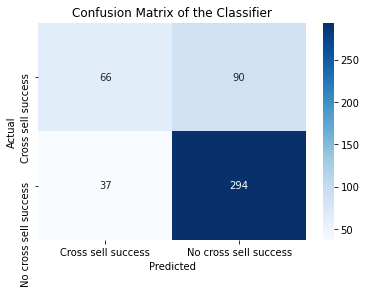

In [91]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_gbm_default_pred,
          labels = ['Cross sell success', 'No cross sell success'])

### Tuning GBM
#### RandomizedSearch CV

In [ ]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 2.0, 0.2)
estimator_space    = pd.np.arange(80, 150, 15)
depth_space        = pd.np.arange(1, 8, 1)
loss_space         = ['deviance', 'exponential']
c_space            = ['friedman_mse', 'mse']
feature_space      = ['auto', 'sqrt', 'log2', None]
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'    : warm_start_space,
              'loss'          : loss_space,
              'criterion'     : c_space, 
              'max_features'   : feature_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [ ]:
full_gbm_cv.cv_results_

In [ ]:
report(full_gbm_cv.cv_results_)

In [ ]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

#### GBM Tuned

- full_gbm_cv.best_estimator_  | FULL | **AUC = 0.7283** 
- Mean validation score: 0.675 (std: 0.011)
- Parameters: {'warm_start': False, 'n_estimators': 125, 'max_features': 'auto', 'max_depth': 1, 'loss': 'deviance', 'learning_rate': 0.5000000000000001, 'criterion': 'friedman_mse'}

In [92]:
# INSTANTIATING the model object without hyperparameters

# I made several attempts to hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5000000000000001, loss='deviance',
                           max_depth=1, max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None,
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(chef_data, chef_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7916
Testing  ACCURACY: 0.7988
AUC Score        : 0.7283


#### Confusion Matrix

In [93]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, 
                                y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 83
False Positives: 73
False Negatives: 25
True Positives : 306



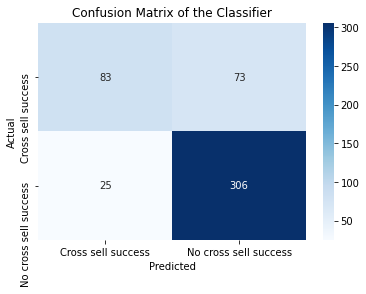

In [94]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = gbm_tuned_pred,
          labels = ['Cross sell success', 'No cross sell success'])

### Saving Model

In [95]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM (Full)',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)

# Choosing Final Model

I am choosing my **Pruned Tree** as my final model with an **AUC of 0.732**

In [96]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
2,Pruned Tree (logit_sig2),0.7320,0.7402,0.7762,"(95, 61, 48, 283)"
4,Tuned GBM (Full),0.7283,0.7916,0.7988,"(83, 73, 25, 306)"
1,Full Tree,0.6265,0.9979,0.6858,"(72, 84, 69, 262)"
3,Tuned Random Forest (Full),0.6254,0.7519,0.7556,"(41, 115, 4, 327)"
0,Logistic (logit_sig2),0.6232,0.7300,0.7228,"(54, 102, 33, 298)"
